<a href="https://colab.research.google.com/github/chvn00/Modelos_Metodos_IA/blob/main/PGFiltro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalar gplearn
!pip install gplearn
!pip install gplearn graphviz

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



📌 Fórmula final generada por Programación Genética:
sin(div(sin(div(div(sin(div(X0, sqrt(cos(X1)))), sqrt(cos(X2))), sqrt(sqrt(cos(X1))))), sqrt(cos(X2))))


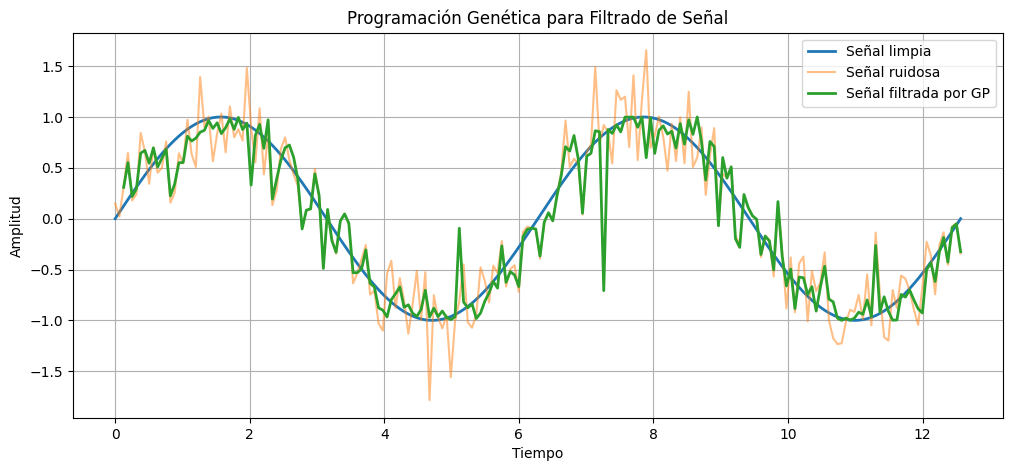

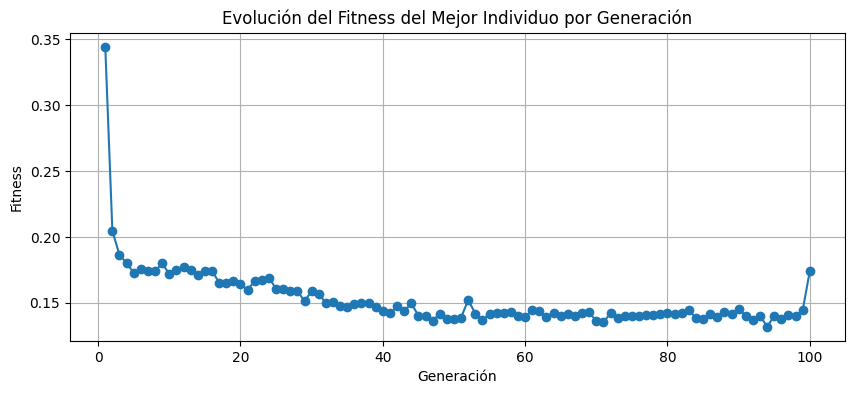

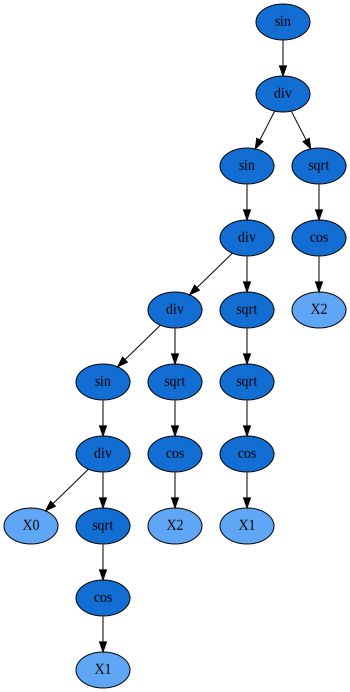

<IPython.core.display.Math object>

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from gplearn.genetic import SymbolicRegressor
from sklearn.model_selection import train_test_split
from graphviz import Source
from IPython.display import SVG, display

# Generar señal
n = 200
t = np.linspace(0, 4*np.pi, n)
signal_clean = np.sin(t)
np.random.seed(42)
noise = np.random.normal(0, 0.3, n)
signal_noisy = signal_clean + noise

# Crear dataset con memoria
X = np.zeros((n-2, 3))
y = signal_clean[2:]
for i in range(2, n):
    X[i-2] = [signal_noisy[i], signal_noisy[i-1], signal_noisy[i-2]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Configurar SymbolicRegressor con mejoras
est_gp = SymbolicRegressor(
    population_size=100,
    generations=100,
    tournament_size=50,
    stopping_criteria=0.00001,
    function_set=['add', 'sub', 'mul', 'div', 'sin', 'cos', 'sqrt', 'log'],
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=0,
    random_state=0,
    n_jobs=1
)

# Entrenar modelo
est_gp.fit(X_train, y_train)

# Extraer fórmula
print("\n📌 Fórmula final generada por Programación Genética:")
print(est_gp._program)

# Aplicar filtro
y_pred = est_gp.predict(X)

# Gráfico de señal filtrada
plt.figure(figsize=(12, 5))
plt.plot(t, signal_clean, label='Señal limpia', linewidth=2)
plt.plot(t, signal_noisy, label='Señal ruidosa', alpha=0.5)
plt.plot(t[2:], y_pred, label='Señal filtrada por GP', linewidth=2)
plt.legend()
plt.title("Programación Genética para Filtrado de Señal")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

# Evolución del fitness
best_fitness_per_gen = []
for generation in est_gp._programs:
    if generation is not None:
        best_programs = [p for p in generation if p is not None]
        if best_programs:
            best_fitness_per_gen.append(best_programs[0].raw_fitness_)

plt.figure(figsize=(10, 4))
plt.plot(range(1, len(best_fitness_per_gen)+1), best_fitness_per_gen, marker='o')
plt.title("Evolución del Fitness del Mejor Individuo por Generación")
plt.xlabel("Generación")
plt.ylabel("Fitness")
plt.grid(True)
plt.show()

# Mostrar árbol de expresión (Graphviz)
dot_data = est_gp._program.export_graphviz()
graph = Source(dot_data)
display(SVG(graph.pipe(format='svg')))

from sympy import symbols, sin, cos, log, sqrt, simplify, Add, Mul
from sympy.parsing.sympy_parser import parse_expr
from sympy.printing import latex
from IPython.display import display, Math

# 1. Definir variables simbólicas
x0, x1, x2 = symbols('x0 x1 x2')

# 2. Obtener fórmula como texto plano y reemplazar
expr_str = str(est_gp._program)

# 3. Reemplazos para compatibilidad con SymPy
expr_str = (expr_str
            .replace("X0", "x0")
            .replace("X1", "x1")
            .replace("X2", "x2")
            .replace("add", "Add")
            .replace("sub", "Sub")  # Sub puede usarse si lo defines, o lo cambias por "-"
            .replace("mul", "Mul")
            .replace("div", "Div"))

# 4. Definir operaciones adicionales si es necesario
from sympy import Function
class Sub(Function):  # si decides usar Sub en lugar de "-", define su comportamiento
    @classmethod
    def eval(cls, a, b):
        return a - b
class Div(Function):
    @classmethod
    def eval(cls, a, b):
        return a / b

# 5. Parseo seguro
expr_sympy = parse_expr(expr_str, evaluate=False)

# 6. Simplificación opcional
expr_sympy = simplify(expr_sympy)

# 7. Visualización
display(Math(f"y[n] = {latex(expr_sympy)}"))


